In [2]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# Data 불러오기

In [4]:
df = pd.read_excel('data/2018_modified_data.xlsx', 
                   index_col=None, header=0) # 파일 불러오기
house_data = df.copy()
house_data.head()

,시군구,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,연도,월,SiDo,SiGunGu,DongLi,ID
0,강원도 강릉시 강동면 모전리,단독,8,64.20,205.0,10520,2018,2018,1,강원도,강릉시,모전리(강동면),강릉
1,강원도 강릉시 견소동,단독,12,35.60,81.0,4000,1990,2018,1,강원도,강릉시,견소동,강릉
2,강원도 강릉시 교동,단독,12,99.90,160.0,16500,1982,2018,1,강원도,강릉시,교동,강릉
3,강원도 강릉시 교동,단독,12,326.88,211.6,64300,2005,2018,1,강원도,강릉시,교동,강릉
4,강원도 강릉시 교동,단독,8,154.99,240.2,19000,1980,2018,1,강원도,강릉시,교동,강릉


# Data 탐색 & 시각화

In [5]:
del house_data['시군구']
house_data.head()

,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,연도,월,SiDo,SiGunGu,DongLi,ID
0,단독,8,64.20,205.0,10520,2018,2018,1,강원도,강릉시,모전리(강동면),강릉
1,단독,12,35.60,81.0,4000,1990,2018,1,강원도,강릉시,견소동,강릉
2,단독,12,99.90,160.0,16500,1982,2018,1,강원도,강릉시,교동,강릉
3,단독,12,326.88,211.6,64300,2005,2018,1,강원도,강릉시,교동,강릉
4,단독,8,154.99,240.2,19000,1980,2018,1,강원도,강릉시,교동,강릉


In [6]:
# 한글 폰트 설정
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')

## 주택유형

In [7]:
house_data['주택유형'].unique()

array(['단독', '다가구'], dtype=object)

In [8]:
house_data['주택유형'][house_data['주택유형'] == '단독'].count()

84367

In [9]:
house_data['주택유형'][house_data['주택유형'] == '다가구'].count()

8789

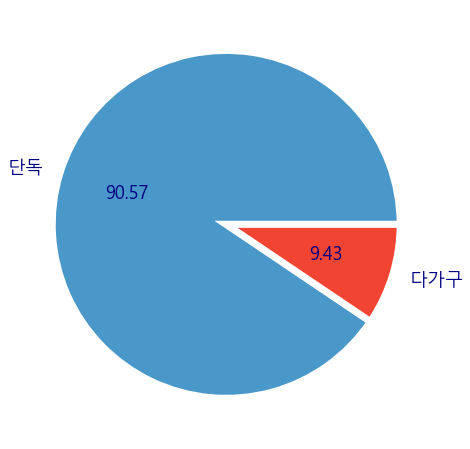

In [10]:
fig_pie = plt.figure(figsize=(8,8))

house_type = house_data['주택유형'].unique()
num1 = house_data['주택유형'][house_data['주택유형'] == '단독'].count()
num2 = house_data['주택유형'][house_data['주택유형'] == '다가구'].count()
num_type = [num1, num2]

plt.rcParams['text.color'] = 'Navy'  # Label color
a, b = [plt.cm.Blues, plt.cm.Reds]
plt.pie(num_type, labels = house_type, colors = [a(0.6), b(0.6)], 
        autopct='%.2f',
        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, 
        textprops={'fontsize': 18})

plt.show()

## 도로조건

In [11]:
house_data['도로조건'].unique()

array([ 8, 12, 25,  0, 26], dtype=int64)

In [12]:
house_data = house_data[house_data['도로조건'] > 0]
# house_data = house_data[house_data['도로조건']!='-']

In [13]:
len(house_data['도로조건'])

91791

In [14]:
house_data['도로조건'].unique()

array([ 8, 12, 25, 26], dtype=int64)

In [15]:
house_data.head()

,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,연도,월,SiDo,SiGunGu,DongLi,ID
0,단독,8,64.20,205.0,10520,2018,2018,1,강원도,강릉시,모전리(강동면),강릉
1,단독,12,35.60,81.0,4000,1990,2018,1,강원도,강릉시,견소동,강릉
2,단독,12,99.90,160.0,16500,1982,2018,1,강원도,강릉시,교동,강릉
3,단독,12,326.88,211.6,64300,2005,2018,1,강원도,강릉시,교동,강릉
4,단독,8,154.99,240.2,19000,1980,2018,1,강원도,강릉시,교동,강릉


In [16]:
road = house_data['도로조건'].unique()
print(road)
num_road = []
for n in range(0,len(road)):
    num_road.append(house_data['도로조건'][house_data['도로조건'] 
                                       == road[n]].count())
num_road

[ 8 12 25 26]


[68171, 18450, 4078, 1092]

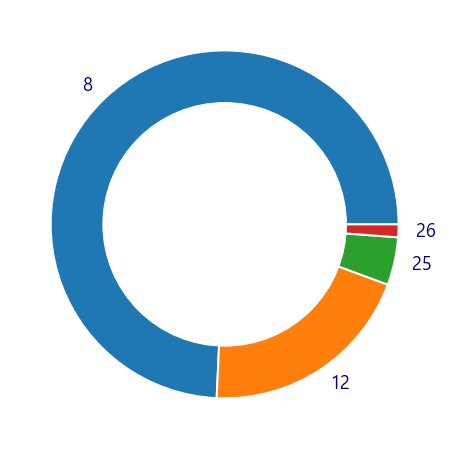

In [17]:
fig_donut = plt.figure(figsize=(8,8))

plt.pie(num_road, labels = road, 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, 
        textprops={'fontsize': 18})

my_circle = plt.Circle( (0,0), 0.7, color='white')  
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

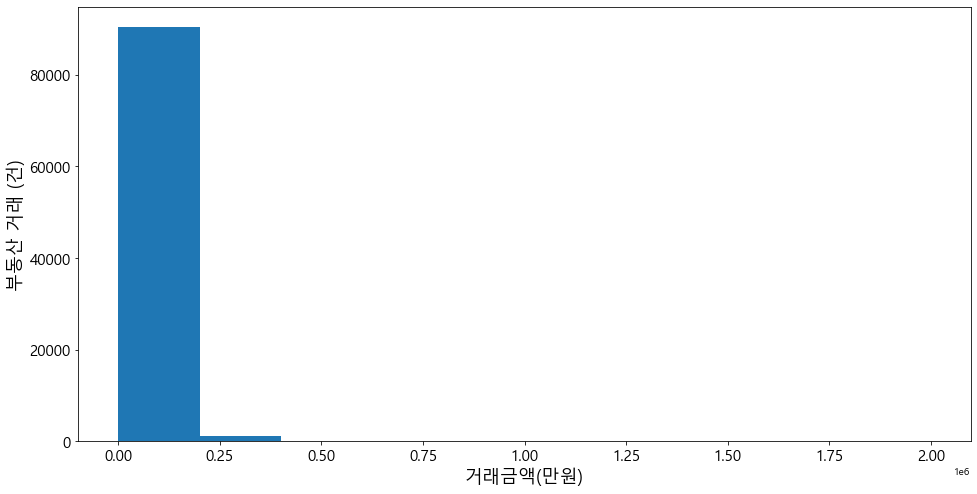

In [18]:
fig_hist = plt.figure(figsize=(16,8))
plt.hist(house_data['거래금액(만원)'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('거래금액(만원)', fontsize=18)
plt.ylabel('부동산 거래 (건)', fontsize=18)
plt.show()

In [19]:
house_data.loc[house_data['거래금액(만원)'].idxmax()]

주택유형             단독
도로조건             25
연면적(㎡)       817.69
대지면적(㎡)      1100.8
거래금액(만원)    1998130
건축년도           1966
연도             2018
월                 7
SiDo          서울특별시
SiGunGu         종로구
DongLi          가회동
ID            서울 종로
Name: 56414, dtype: object

In [20]:
house_data['거래금액(만원)'].nlargest(5)

56414    1998130
85528    1835000
71582    1612731
47734    1410000
20721    1357500
Name: 거래금액(만원), dtype: int64

In [21]:
house_data[house_data['거래금액(만원)'] > 1000000]  # 100억 이상

,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,연도,월,SiDo,SiGunGu,DongLi,ID
5581,단독,8,657.84,1103.4,1150000,1997,2018,1,서울특별시,용산구,이태원동,서울 용산
5621,단독,8,584.11,639.0,1100000,1991,2018,1,서울특별시,용산구,한남동,서울 용산
5747,단독,26,1503.54,793.0,1325000,1997,2018,1,서울특별시,중구,신당동,서울 중구
20716,단독,25,830.76,342.2,1110000,1988,2018,3,서울특별시,강남구,대치동,서울 강남
20720,단독,25,1326.96,353.1,1210000,1992,2018,3,서울특별시,강남구,신사동,서울 강남
20721,다가구,26,657.60,599.4,1357500,1994,2018,3,서울특별시,강남구,역삼동,서울 강남
22144,단독,8,567.09,654.0,1175000,1966,2018,3,서울특별시,용산구,한남동,서울 용산
22345,단독,12,247.31,326.9,1038300,1998,2018,3,서울특별시,중구,입정동,서울 중구
30221,단독,12,666.54,510.5,1265000,1976,2018,4,서울특별시,강남구,청담동,서울 강남
47734,다가구,25,593.17,192.1,1410000,1992,2018,6,서울특별시,강남구,신사동,서울 강남


In [22]:
# 거래금액이 300,000 만원(30억원) 이상인 row 삭제
house_data0 = house_data[house_data['거래금액(만원)'] < 300000] 

len(house_data0)

91296

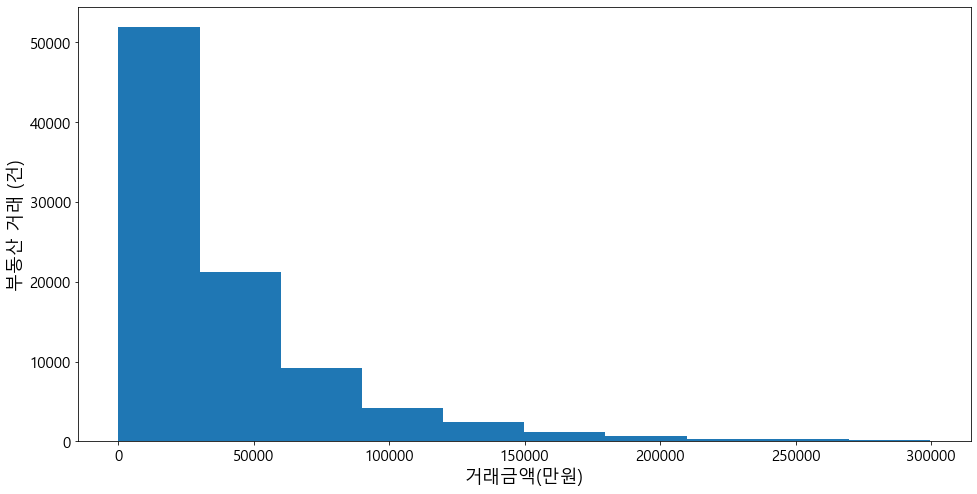

In [23]:
fig_hist = plt.figure(figsize=(16,8))

plt.hist(house_data0['거래금액(만원)'])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('거래금액(만원)', fontsize=18)
plt.ylabel('부동산 거래 (건)', fontsize=18)

plt.show()

### Q. 거래금액의 평균과 표준편차를 이용하여 거래금액 제외

In [24]:
house_value_mean = house_data['거래금액(만원)'].mean()
house_value_std = house_data['거래금액(만원)'].std()
print(house_value_mean, house_value_std)

41452.551688073996 53157.70197397065


In [25]:
house_data = house_data[house_data['거래금액(만원)'] 
                        < house_value_mean + 2*house_value_std] 
len(house_data)

88593

In [26]:
house_value_mean + 2*house_value_std

147767.9556360153

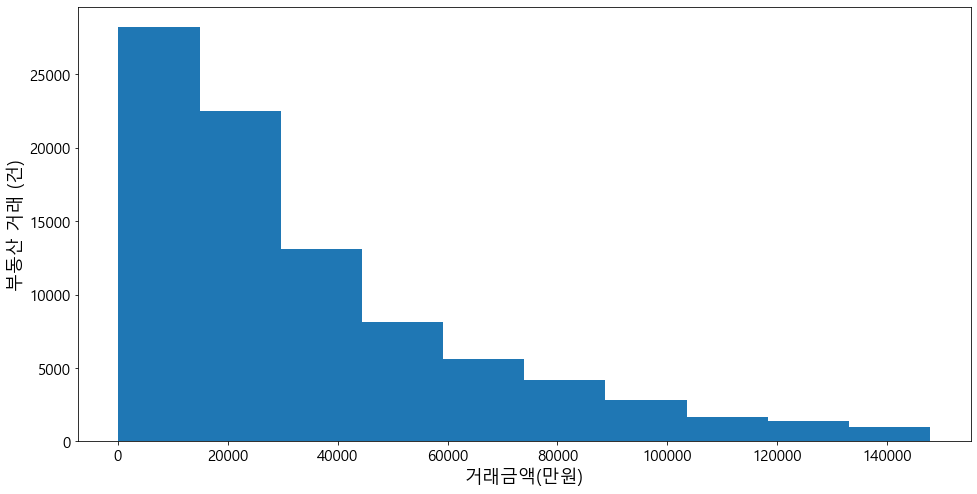

In [27]:
fig_hist = plt.figure(figsize=(16,8))

plt.hist(house_data['거래금액(만원)'])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('거래금액(만원)', fontsize=18)
plt.ylabel('부동산 거래 (건)', fontsize=18)

plt.show()

In [28]:
house_data[house_data['월'] == 2]

,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,연도,월,SiDo,SiGunGu,DongLi,ID
7862,단독,8,105.31,661.0,18000,2006,2018,2,강원도,강릉시,심곡리(강동면),강릉
7863,단독,12,40.96,23.0,5500,1991,2018,2,강원도,강릉시,강문동,강릉
7864,단독,8,88.99,161.0,10500,1981,2018,2,강원도,강릉시,교동,강릉
7865,단독,8,72.00,660.0,9315,2013,2018,2,강원도,강릉시,어단리(구정면),강릉
7866,단독,8,45.32,456.0,19500,1958,2018,2,강원도,강릉시,남항진동,강릉
...,...,...,...,...,...,...,...,...,...,...,...,...
14760,단독,12,533.16,336.3,60000,2010,2018,2,충청북도,충주시,연수동,충주
14761,단독,8,52.90,155.0,5950,1971,2018,2,충청북도,충주시,용산동,충주
14762,단독,8,29.98,198.0,3500,1999,2018,2,충청북도,충주시,신양리(주덕읍),충주
14763,단독,8,43.44,116.0,2800,1971,2018,2,충청북도,충주시,지현동,충주


In [29]:
month = list(range(1,13))
month_num = []
for m in month:
    month_num.append(house_data['월'][house_data['월'] == m].count())

print(month)
print(month_num)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[7497, 6576, 9880, 8337, 8540, 7897, 7074, 7263, 7042, 7422, 6364, 4701]


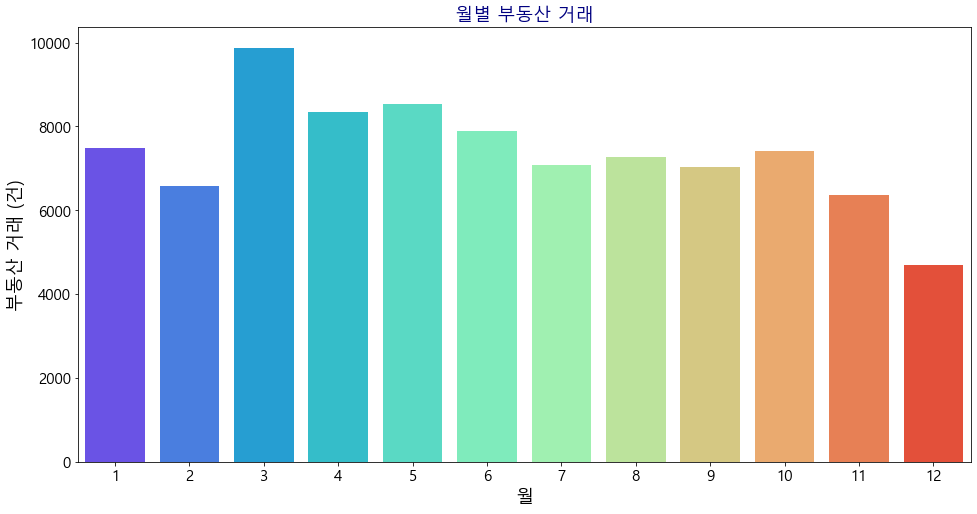

In [30]:
fig_bar = plt.figure(figsize=(16,8))

# plt.bar(month, month_num, align='center')
sns.barplot(x=month, y=month_num, palette="rainbow") 
# palette='rainbow' # palette="rocket"

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('월', fontsize=18)
plt.ylabel('부동산 거래 (건)', fontsize=18)
plt.title('월별 부동산 거래', fontsize=18)

plt.show()

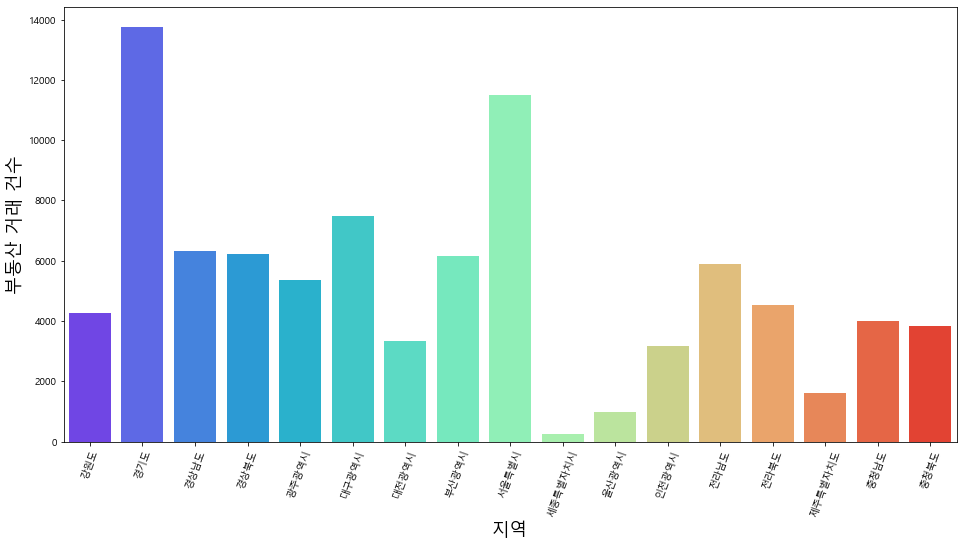

In [31]:
fig = plt.figure(figsize=(16,8))
sns.countplot(x='SiDo', data=house_data, palette='rainbow')

plt.xlabel('지역', fontsize=18)
plt.ylabel('부동산 거래 건수', fontsize=18)
plt.xticks(rotation=70)

plt.show()

In [32]:
house_data["SiDo"].value_counts()

경기도        13738
서울특별시      11508
대구광역시       7481
경상남도        6312
경상북도        6216
부산광역시       6140
전라남도        5900
광주광역시       5363
전라북도        4533
강원도         4257
충청남도        3991
충청북도        3830
대전광역시       3325
인천광역시       3155
제주특별자치도     1608
울산광역시        990
세종특별자치시      246
Name: SiDo, dtype: int64

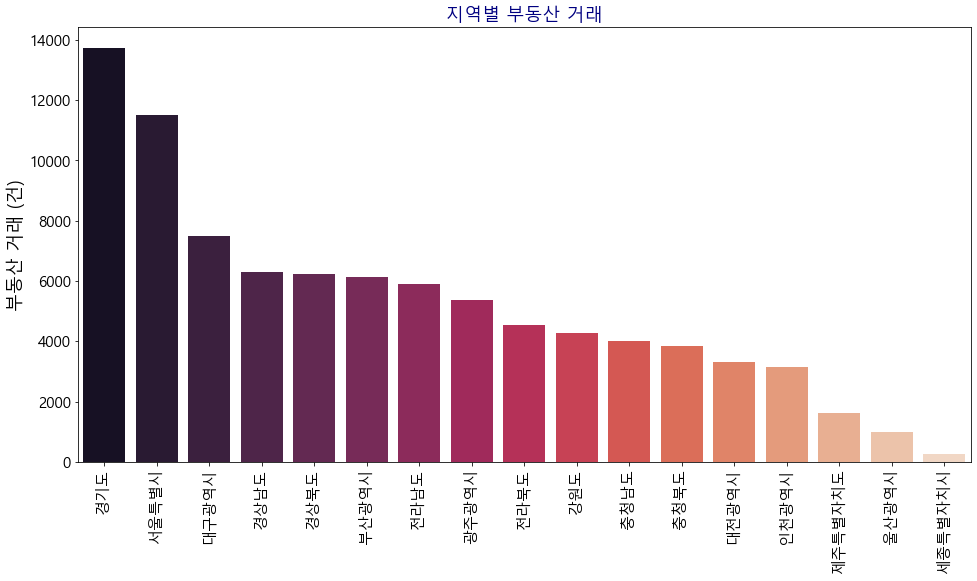

In [33]:
fig = plt.figure(figsize=(16,8))

region_counts = house_data["SiDo"].value_counts()
sns.barplot(x=region_counts.index, y=region_counts, palette="rocket")

plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('부동산 거래 (건)', fontsize=18)
plt.title('지역별 부동산 거래', fontsize=18)
plt.grid(False)

plt.show()

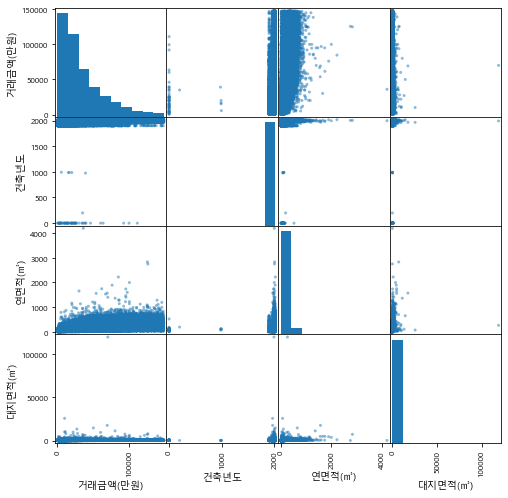

In [34]:
attributes = ['거래금액(만원)', '건축년도','연면적(㎡)','대지면적(㎡)']
fig = scatter_matrix(house_data[attributes], figsize=(8,8))

In [35]:

house_data = house_data[house_data['건축년도'] > 1900] 
    # 건축년도가 1900 이하인 row 삭제(data 입력 오류)
house_data = house_data[house_data['대지면적(㎡)'] < 3000] 
    # 대지면적이 3000㎡ 이상인 row 삭제
house_data = house_data[house_data['연면적(㎡)'] < 3000] 
    # 연면적이 3000 ㎡ 이상인 row 삭제

house_data.reset_index(inplace=True, drop=True) # 인덱스 정리
len(house_data)

87460

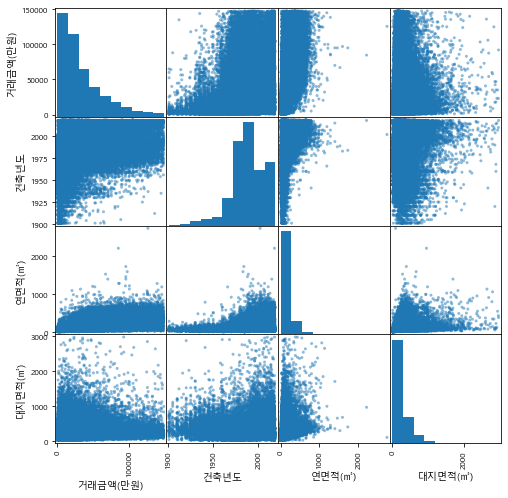

In [36]:
fig = scatter_matrix(house_data[attributes], figsize=(8,8))

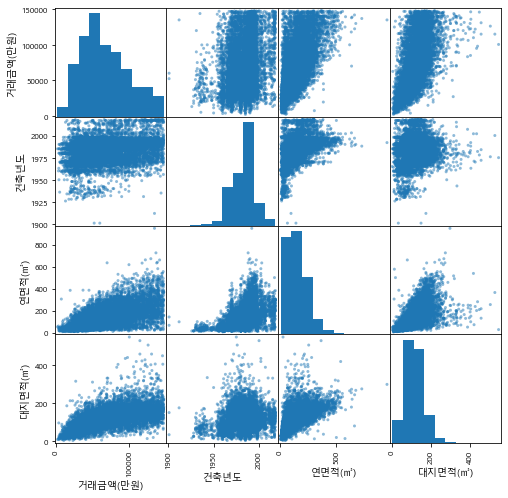

In [37]:
house_data1 = house_data[house_data['SiDo'] == '서울특별시'] # 지역 제한
fig = scatter_matrix(house_data1[attributes], figsize=(8,8))
# sns.pairplot(house_data1[attributes])
plt.show()

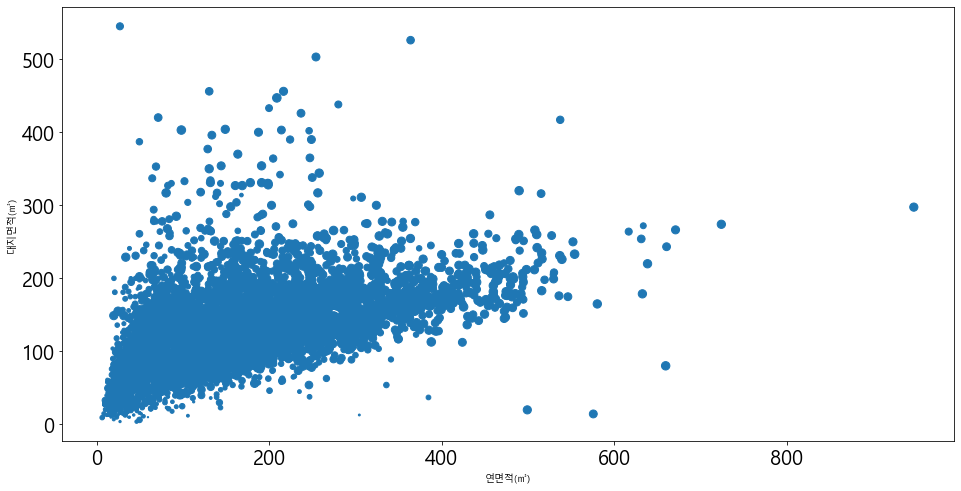

In [38]:
house_data1.plot.scatter(x="연면적(㎡)", y="대지면적(㎡)", 
                         s= house_data1["거래금액(만원)"]/2000, 
                         figsize=(16,8), fontsize=20)
plt.grid(False)

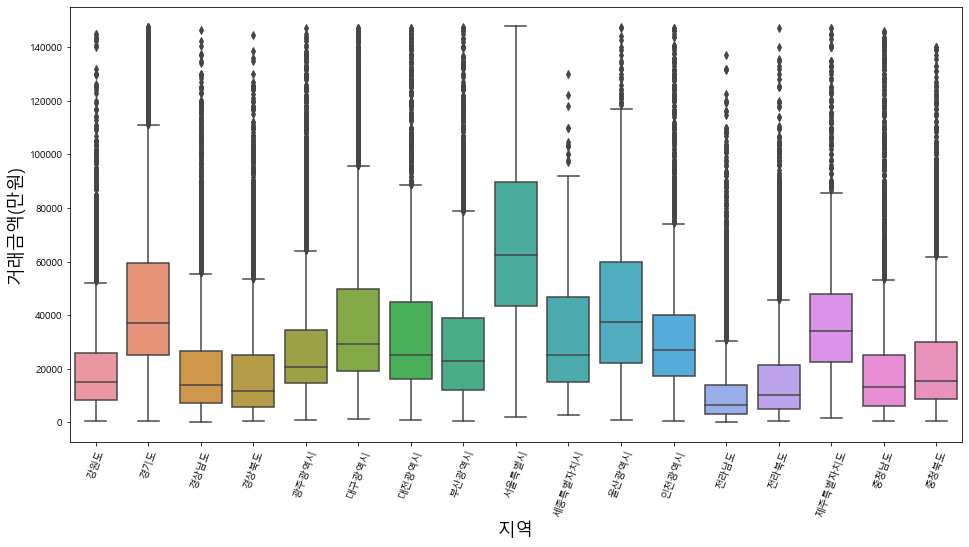

In [39]:
fig = plt.figure(figsize=(16,8))
sns.boxplot(x="SiDo", y="거래금액(만원)", data=house_data)
plt.xlabel('지역', fontsize=18)
plt.ylabel('거래금액(만원)', fontsize=18)
plt.xticks(rotation=70)
plt.show()